In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("C:/Users/garci/Desktop/Data analytics/Analisis/Uber/ncr_ride_bookings.csv")

In [3]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [5]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [6]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [7]:
df.duplicated(subset=['Booking ID']).sum()

np.int64(1233)

#### Como el bookingID no es único incluimos una columna de ID

In [8]:
df['TripID'] = df.index

In [9]:
df['Vehicle Type'].value_counts()

Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64

#### Viajes totales

In [10]:
df.loc[:,'Booking ID'].count()

np.int64(150000)

#### Porcentaje de viajes completados

In [11]:
total_viajes = len(df)
mask_total_bookings = (df['Booking Status'] == 'Completed')
viajes_completados = len((df.loc[mask_total_bookings]))
p_viajes_completos = int((viajes_completados*100)/total_viajes)
print("Un total de " +str(viajes_completados)+" viajes con un porcentaje de completado de "+str(p_viajes_completos)+"%")

Un total de 93000 viajes con un porcentaje de completado de 62%


#### Ratio de cancelaciones

In [12]:
mask_cancelados_usuario = (df['Booking Status'] == 'Cancelled by Customer')
mask_cancelados_conductor = (df['Booking Status'] == 'Cancelled by Driver')
cancelados_usuario = len((df.loc[mask_cancelados_usuario]))
cancelados_conductor = len((df.loc[mask_cancelados_conductor]))
p_cancelados_usuario = int((cancelados_usuario*100)/total_viajes)
p_cancelados_conductor = int((cancelados_conductor*100)/total_viajes)

In [13]:
print("Un total de " +str(cancelados_usuario)+" viajes cancelados por los usuarios con un porcentaje de cancelaciones de "+str(p_cancelados_usuario)+"%")

Un total de 10500 viajes cancelados por los usuarios con un porcentaje de cancelaciones de 7%


In [14]:
print("Un total de " +str(cancelados_conductor)+" viajes cancelados por los conductores con un porcentaje de cancelaciones de "+str(p_cancelados_conductor)+"%")

Un total de 27000 viajes cancelados por los conductores con un porcentaje de cancelaciones de 18%


#### Viajes perdidos por conductor no encontrado

In [15]:
mask_sin_conductor = (df['Booking Status'] == 'No Driver Found')
sin_conductor = len((df.loc[mask_sin_conductor]))
p_sin_conductor = int((sin_conductor*100)/total_viajes)
print("Un total de " +str(sin_conductor)+" viajes perdidos por falta de conductor con un porcentaje de "+str(p_sin_conductor)+"%")

Un total de 10500 viajes perdidos por falta de conductor con un porcentaje de 7%


In [16]:
df.loc[mask_total_bookings,'Booking ID'].count()

np.int64(93000)

#### Pasamos a datetime la fecha para poder recuperar el día de la semana y mes

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [18]:
df['weekday']  = df["Date"].dt.day_name()
df['month']  = df["Date"].dt.month_name()

In [19]:
bookings_by_day = df.groupby(['weekday'])['TripID'].count().reset_index()

In [20]:
bookings_by_day = bookings_by_day.rename(columns={'TripID':'Bookings'})

In [21]:
bookings_by_day = bookings_by_day.sort_values(by='Bookings', ascending = False)

In [22]:
bookings_by_day

,weekday,Bookings
1,Monday,21644
2,Saturday,21542
6,Wednesday,21413
3,Sunday,21398
0,Friday,21397
5,Tuesday,21391
4,Thursday,21215


#### Los 10 puntos de recogida más repetidos

In [23]:
pickup = df.groupby(['Pickup Location'])['TripID'].count().reset_index()
pickup = pickup.rename(columns={'TripID':'Number of trips'})
pickup = pickup.sort_values(by='Number of trips', ascending = False)
pickup = pickup.head(10)

In [24]:
pickup

,Pickup Location,Number of trips
80,Khandsa,949
16,Barakhamba Road,946
141,Saket,931
13,Badarpur,921
124,Pragati Maidan,920
88,Madipur,919
0,AIIMS,918
96,Mehrauli,915
34,Dwarka Sector 21,914
120,Pataudi Chowk,907


#### Los 10 puntos de llegada más repetidos

In [25]:
drop = df.groupby(['Drop Location'])['TripID'].count().reset_index()
drop = drop.rename(columns={'TripID':'Number of trips'})
drop = drop.sort_values(by='Number of trips', ascending = False)
drop = drop.head(10)

In [26]:
drop

,Drop Location,Number of trips
10,Ashram,936
17,Basai Dhankot,917
86,Lok Kalyan Marg,916
102,Narsinghpur,913
28,Cyber Hub,912
71,Kalkaji,912
76,Kashmere Gate ISBT,909
165,Udyog Vihar,906
83,Lajpat Nagar,904
104,Nehru Place,902


## Estadísticas por vehículos

#### Viajes totales

In [27]:
vehicle_bookings = df.groupby(['Vehicle Type'])['TripID'].count().reset_index()
vehicle_bookings = vehicle_bookings.rename(columns={'TripID':'Number of trips'})
vehicle_bookings = vehicle_bookings.sort_values(by='Number of trips', ascending = False)

In [28]:
vehicle_bookings

,Vehicle Type,Number of trips
0,Auto,37419
2,Go Mini,29806
3,Go Sedan,27141
1,Bike,22517
4,Premier Sedan,18111
6,eBike,10557
5,Uber XL,4449


#### Distancia total recorrida

In [29]:
vehicle_total_distance = df.groupby(['Vehicle Type'])['Ride Distance'].sum().reset_index()
vehicle_total_distance['Ride Distance'] = vehicle_total_distance['Ride Distance'].round(2)
vehicle_total_distance = vehicle_total_distance.rename(columns={'Ride Distance':'Total Ride Distance'})
vehicle_total_distance = vehicle_total_distance.sort_values(by='Total Ride Distance', ascending = False)
vehicle_total_distance

,Vehicle Type,Total Ride Distance
0,Auto,625615.53
2,Go Mini,501200.60
3,Go Sedan,450793.61
1,Bike,378666.33
4,Premier Sedan,302936.14
6,eBike,179456.17
5,Uber XL,74306.81


#### Distancia media recorrida

In [30]:
vehicle_avg_distance = df.groupby(['Vehicle Type'])['Ride Distance'].mean().reset_index()
vehicle_avg_distance['Ride Distance'] = vehicle_avg_distance['Ride Distance'].round(2)
vehicle_avg_distance = vehicle_avg_distance.rename(columns={'Ride Distance':'Average Ride Distance'})
vehicle_avg_distance = vehicle_avg_distance.sort_values(by='Average Ride Distance', ascending = False)
vehicle_avg_distance

,Vehicle Type,Average Ride Distance
6,eBike,24.99
1,Bike,24.65
0,Auto,24.62
2,Go Mini,24.61
3,Go Sedan,24.61
4,Premier Sedan,24.60
5,Uber XL,24.40


#### Tarifa media

In [31]:
vehicle_fare = df.groupby(['Vehicle Type'])['Booking Value'].mean().reset_index()
vehicle_fare['Booking Value'] = vehicle_fare['Booking Value'].round(2)
vehicle_fare = vehicle_fare.rename(columns={'Booking Value':'Average Fare'})
vehicle_fare = vehicle_fare.sort_values(by='Average Fare', ascending = False)
vehicle_fare

,Vehicle Type,Average Fare
3,Go Sedan,511.50
1,Bike,510.20
4,Premier Sedan,509.57
2,Go Mini,507.68
0,Auto,506.73
6,eBike,503.90
5,Uber XL,501.82


#### Porcentaje de viajes completados por vehículo

In [32]:
totales = df.groupby(['Vehicle Type'])['Booking Status'].count()

In [33]:
completados = df[df['Booking Status'] == 'Completed'].groupby('Vehicle Type')['Booking Status'].count()

In [34]:
porcentaje_completados = (completados * 100)/totales
porcentaje_completados

Vehicle Type
Auto             61.880328
Bike             62.326242
Go Mini          62.232436
Go Sedan         61.442099
Premier Sedan    62.127989
Uber XL          62.553383
eBike            62.053614
Name: Booking Status, dtype: float64

In [35]:
porcentaje_completados

Vehicle Type
Auto             61.880328
Bike             62.326242
Go Mini          62.232436
Go Sedan         61.442099
Premier Sedan    62.127989
Uber XL          62.553383
eBike            62.053614
Name: Booking Status, dtype: float64

In [36]:
## vehicle_bookings, vehicle_total_distance, vehicle_avg_distance, vehicle_fare, porcentaje_completados
stats_table = vehicle_bookings.merge(vehicle_total_distance,on='Vehicle Type').merge(vehicle_avg_distance,on='Vehicle Type').merge(vehicle_fare,on='Vehicle Type').merge(porcentaje_completados,on='Vehicle Type')
stats_table = stats_table.rename(columns={'Booking Status':'Completion percentage'})

In [37]:
stats_table

,Vehicle Type,Number of trips,Total Ride Distance,Average Ride Distance,Average Fare,Completion percentage
0,Auto,37419,625615.53,24.62,506.73,61.880328
1,Go Mini,29806,501200.60,24.61,507.68,62.232436
2,Go Sedan,27141,450793.61,24.61,511.50,61.442099
3,Bike,22517,378666.33,24.65,510.20,62.326242
4,Premier Sedan,18111,302936.14,24.60,509.57,62.127989
5,eBike,10557,179456.17,24.99,503.90,62.053614
6,Uber XL,4449,74306.81,24.40,501.82,62.553383


## Distribución del método de pago

In [38]:
mask_completos = df['Booking Status'] == 'Completed'
viajes_completos = df.loc[mask_completos]

In [39]:
payment_dist = ((viajes_completos['Payment Method'].value_counts(normalize=True) * 100).reset_index()).round(2)
payment_dist = payment_dist.rename(columns={'proportion':'Percentage'})

In [40]:
payment_dist

,Payment Method,Percentage
0,UPI,44.98
1,Cash,24.85
2,Uber Wallet,12.05
3,Credit Card,10.02
4,Debit Card,8.09


## Distribución razones cancelación

#### Cancelaciones usuarios

In [41]:
user_cancellations = ((df['Reason for cancelling by Customer'].value_counts(normalize=True) * 100).reset_index()).round(2)
user_cancellations = user_cancellations.rename(columns={'proportion':'Percentage'})
user_cancellations

,Reason for cancelling by Customer,Percentage
0,Wrong Address,22.50
1,Change of plans,22.41
2,Driver is not moving towards pickup location,22.24
3,Driver asked to cancel,21.86
4,AC is not working,11.00


#### Cancelaciones conductores

In [42]:
driver_cancellations = ((df['Driver Cancellation Reason'].value_counts(normalize=True) * 100).reset_index()).round(2)
driver_cancellations = driver_cancellations.rename(columns={'proportion':'Percentage'})
driver_cancellations

,Driver Cancellation Reason,Percentage
0,Customer related issue,25.32
1,The customer was coughing/sick,25.00
2,Personal & Car related issues,24.91
3,More than permitted people in there,24.76


#### Viajes incompletos

In [43]:
incomplete_bookings = ((df['Incomplete Rides Reason'].value_counts(normalize=True) * 100).reset_index()).round(2)
incomplete_bookings = incomplete_bookings.rename(columns={'proportion':'Percentage'})
incomplete_bookings

,Incomplete Rides Reason,Percentage
0,Customer Demand,33.78
1,Vehicle Breakdown,33.47
2,Other Issue,32.76


## Puntuaciones conductores y usuarios

In [44]:
avg_customer_rating = (df['Customer Rating'].mean()).round(2)
print("La puntuación media de los usuarios es " + str(avg_customer_rating))

La puntuación media de los usuarios es 4.4


#### Media puntuación usuario por vehículo

In [45]:
vehicle_rating = (df.groupby('Vehicle Type')['Customer Rating'].mean().reset_index()).round(3)
vehicle_rating = vehicle_rating.sort_values(by='Customer Rating',ascending = False)
vehicle_rating

,Vehicle Type,Customer Rating
3,Go Sedan,4.410
5,Uber XL,4.405
1,Bike,4.404
6,eBike,4.404
2,Go Mini,4.404
4,Premier Sedan,4.403
0,Auto,4.402


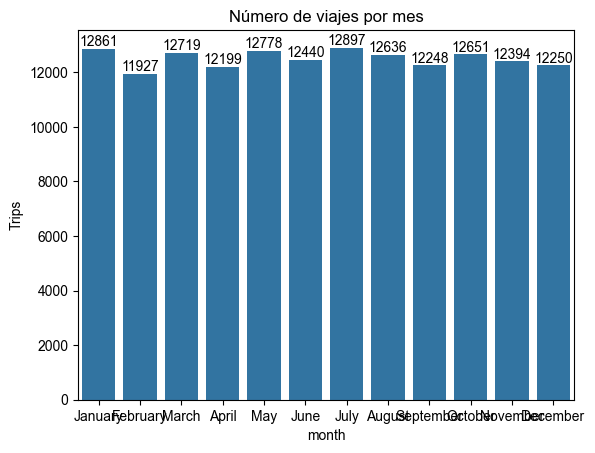

In [46]:
orden_meses = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_meses = df.groupby('month')['TripID'].count().reset_index()
df_meses = df_meses.rename(columns={'TripID':'Trips'})
ax = sns.barplot(
    df_meses,
    x = 'month',
    y = 'Trips',
    order = orden_meses
)
for container in ax.containers:
    ax.bar_label(container)
sns.set_theme(rc={'figure.figsize':(18,8)})
plt.title('Número de viajes por mes')
plt.show()

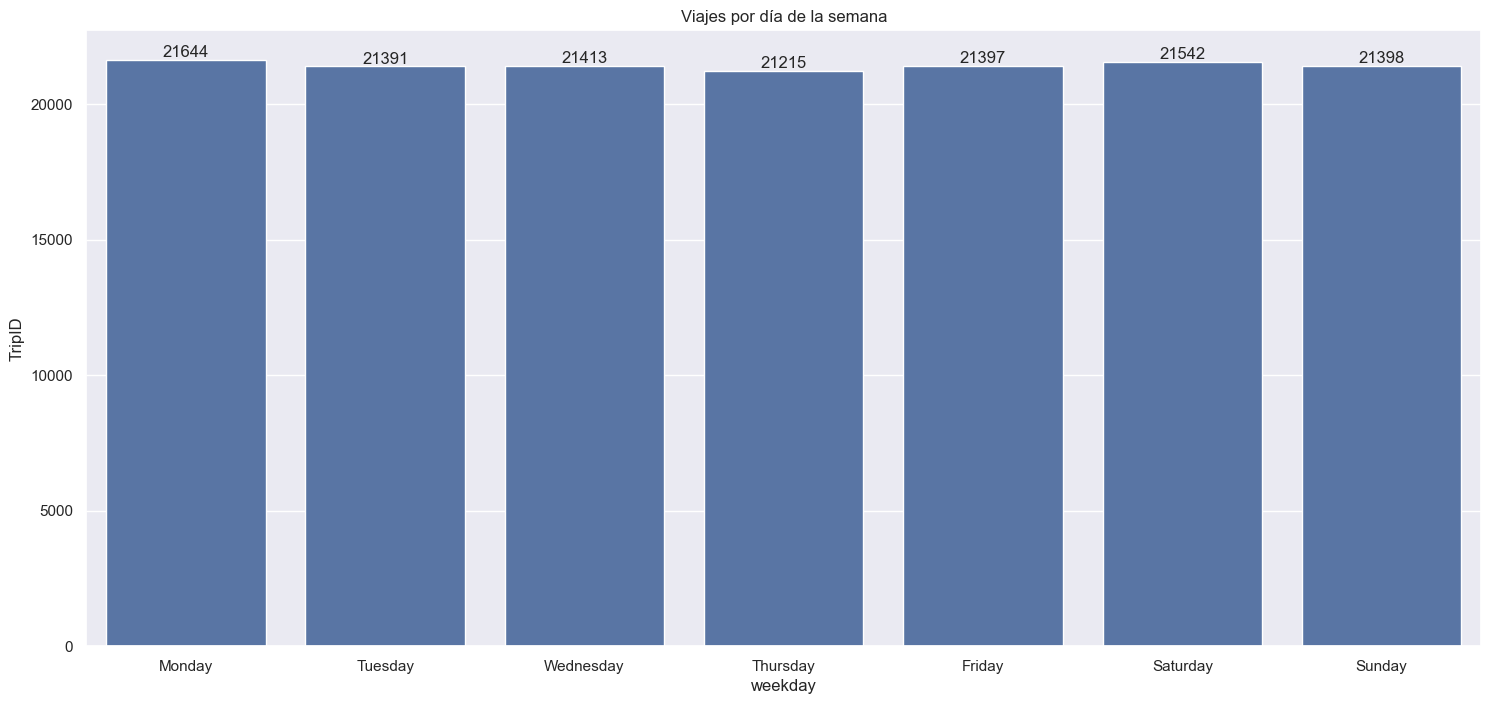

In [47]:
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
viajes_dia = df.groupby('weekday')['TripID'].count().reset_index()
ax = sns.barplot(
    viajes_dia,
    x = 'weekday',
    y = 'TripID',
    order = orden_dias
)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Viajes por día de la semana")
plt.show()

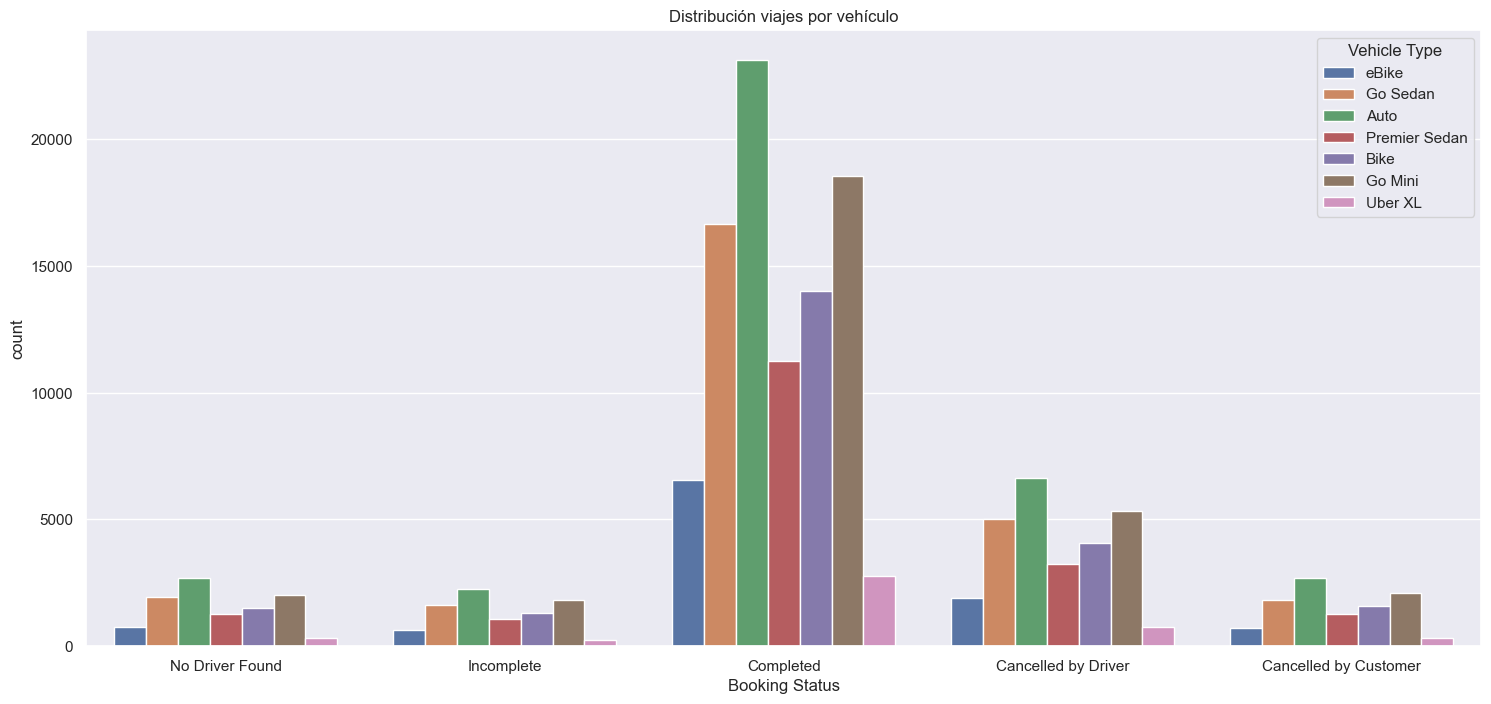

In [48]:
ax = sns.countplot(
    df,
    x = 'Booking Status',
    hue = 'Vehicle Type'
)
plt.title("Distribución viajes por vehículo")
plt.show()

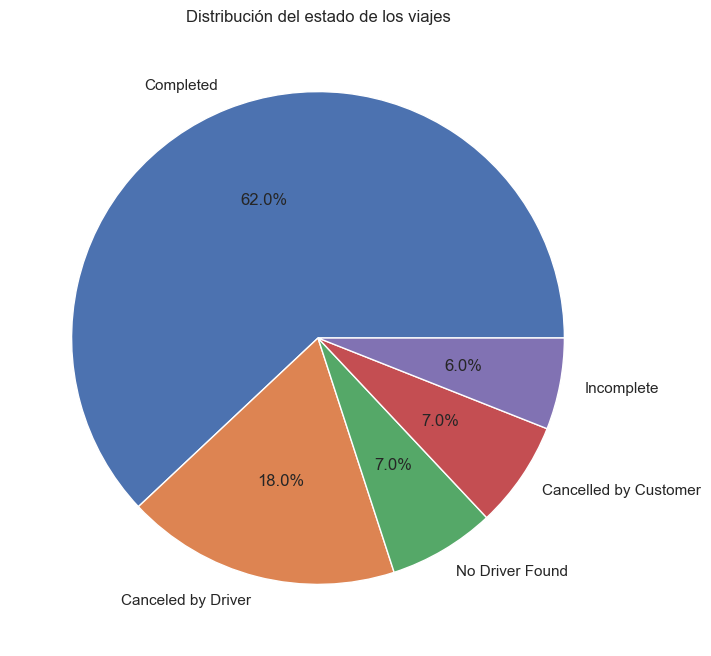

In [49]:
y = df['Booking Status'].value_counts()
labels = ['Completed','Canceled by Driver','No Driver Found','Cancelled by Customer','Incomplete']
plt.pie(
    y,
    labels = labels,
    autopct='%1.1f%%'
)
plt.title("Distribución del estado de los viajes")
plt.show()

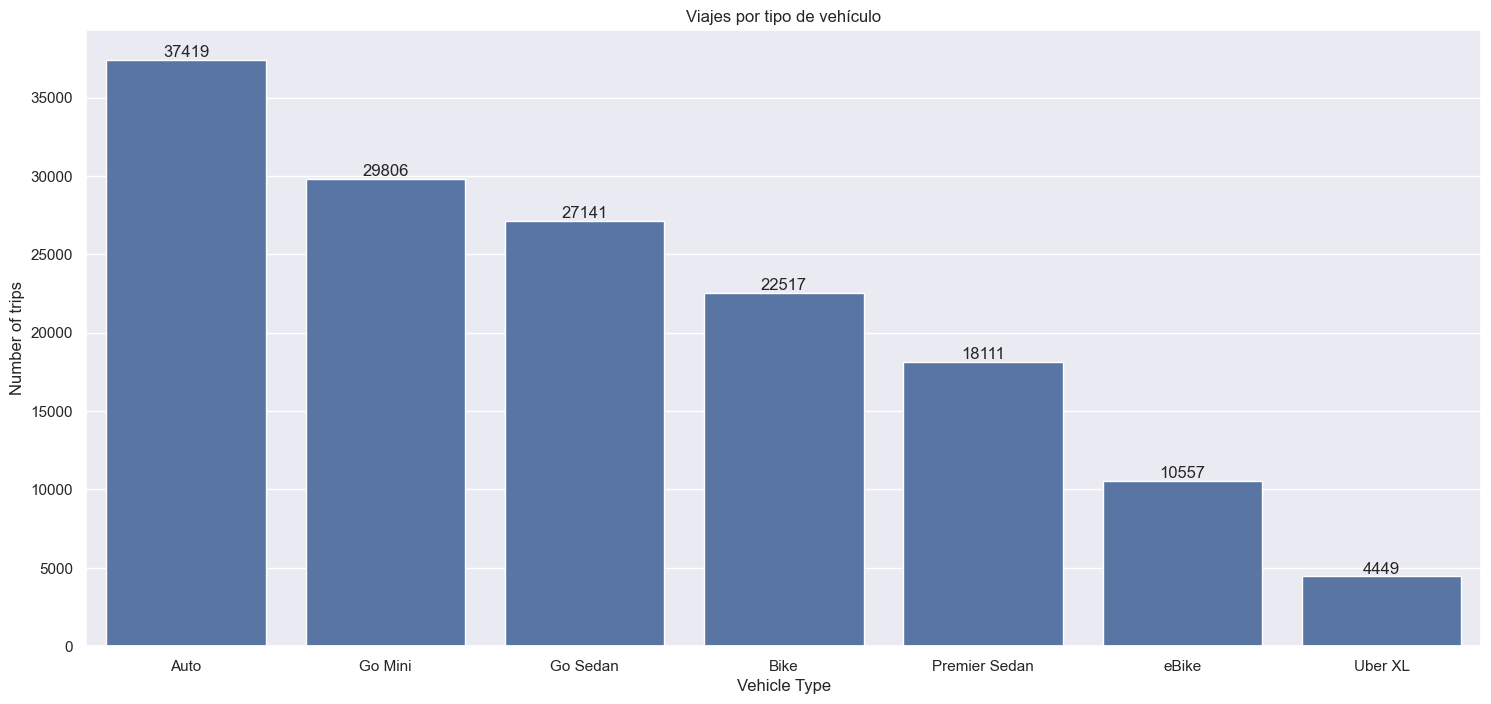

In [50]:
ax = sns.barplot(
    vehicle_bookings,
    x = 'Vehicle Type',
    y='Number of trips'
)

for container in ax.containers:
    ax.bar_label(container)
plt.title("Viajes por tipo de vehículo")
plt.show()

#### Ingresos

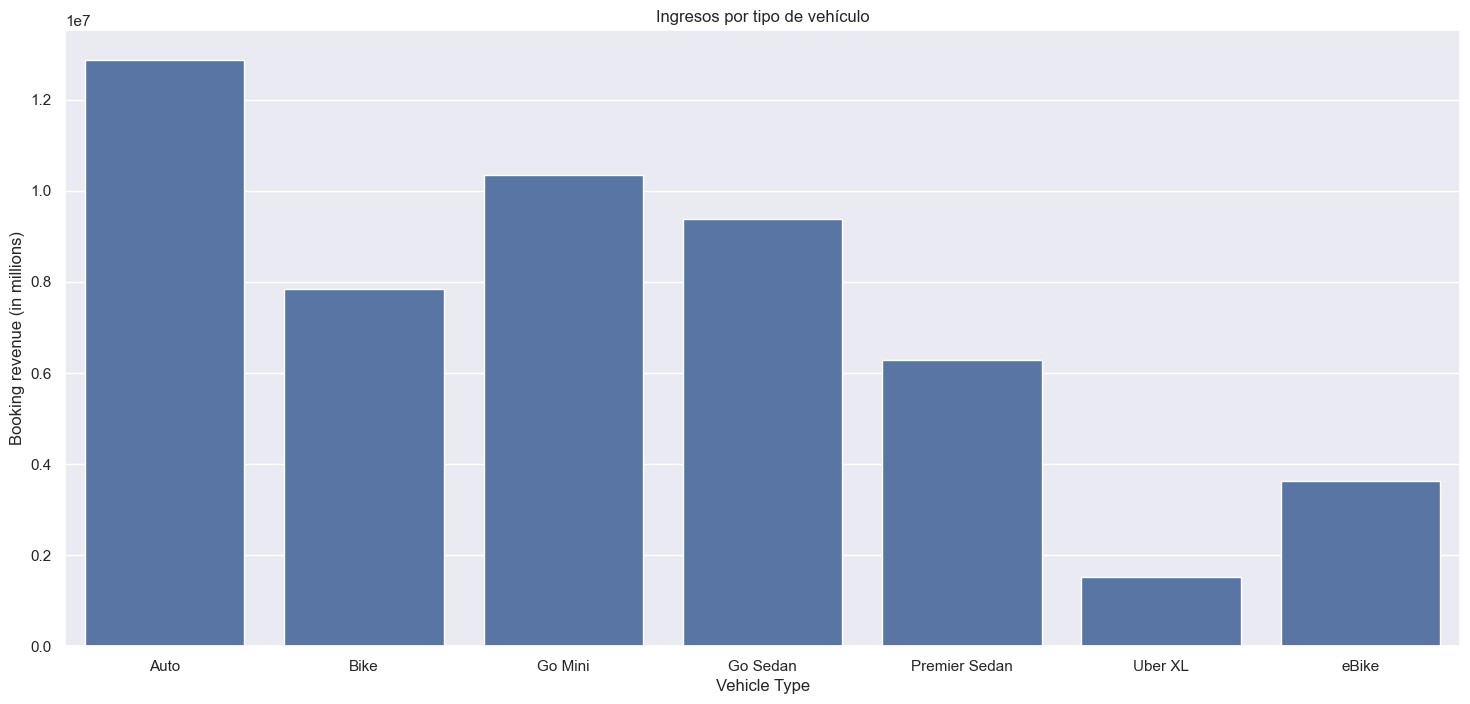

In [51]:
vehicle_revenue = df.groupby('Vehicle Type')['Booking Value'].sum().reset_index()
vehicle_revenue['Booking Value'] = vehicle_revenue['Booking Value'].astype(int)
ax = sns.barplot(
    vehicle_revenue,
    x = 'Vehicle Type',
    y = 'Booking Value'
)
ax.set_ylabel("Booking revenue (in millions)")
plt.title("Ingresos por tipo de vehículo")
plt.show()

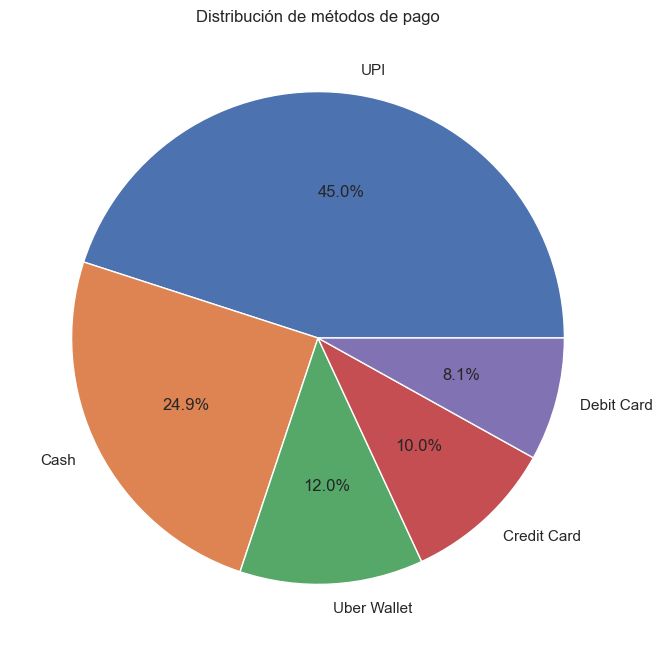

In [52]:
y = df['Payment Method'].value_counts()
labels = ['UPI','Cash','Uber Wallet','Credit Card','Debit Card']
plt.pie(
    y,
    labels = labels,
    autopct='%1.1f%%'
)
plt.title("Distribución de métodos de pago")
plt.show()

#### Cancelaciones

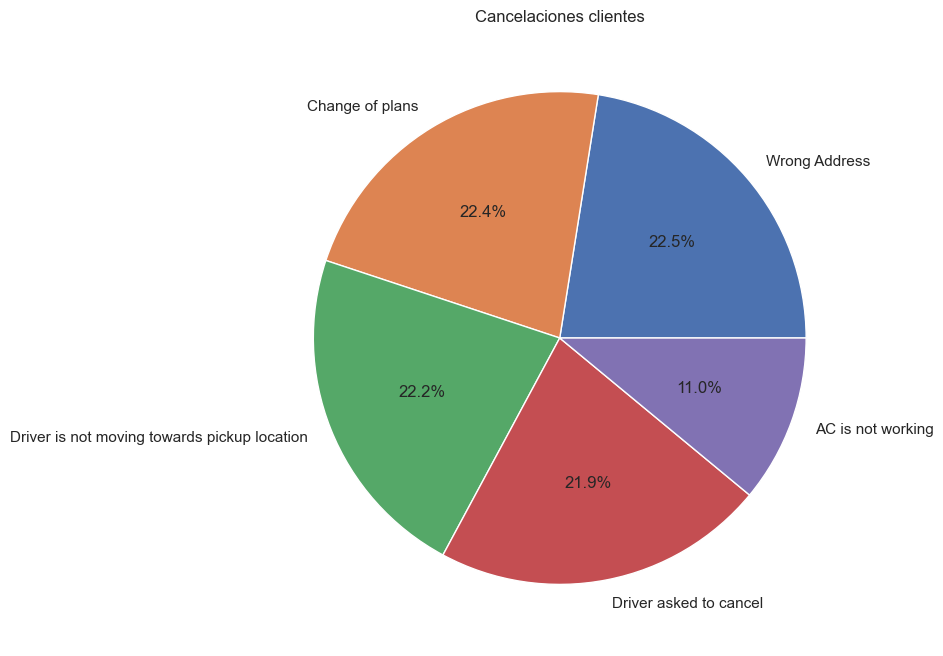

In [53]:
y = df['Reason for cancelling by Customer'].value_counts()
labels = ['Wrong Address','Change of plans','Driver is not moving towards pickup location','Driver asked to cancel','AC is not working']
plt.pie(
    y,
    labels = labels,
    autopct='%1.1f%%'
)
plt.title("Cancelaciones clientes")
plt.show()

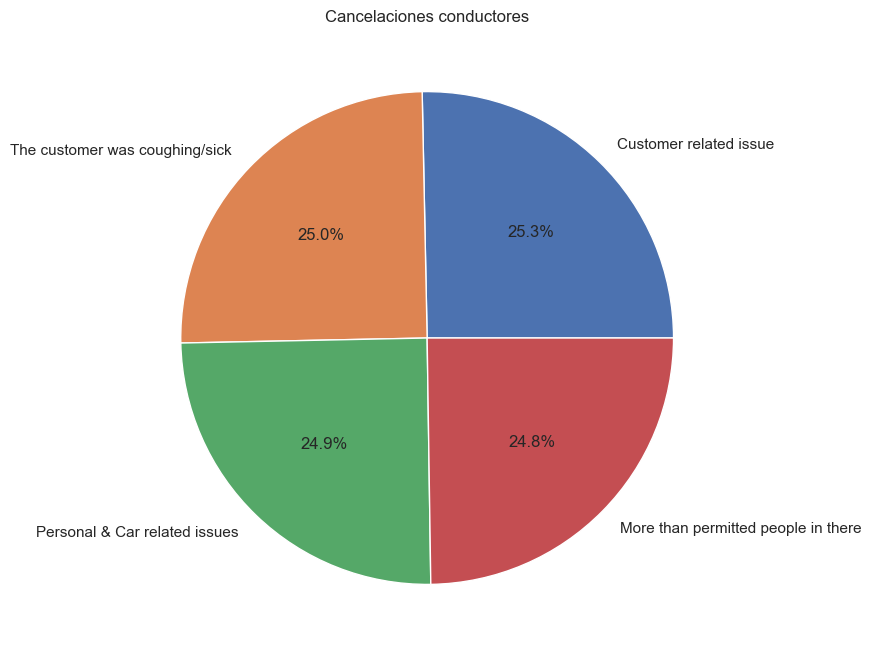

In [54]:
y = df['Driver Cancellation Reason'].value_counts()
labels = ['Customer related issue','The customer was coughing/sick','Personal & Car related issues','More than permitted people in there']
plt.pie(
    y,
    labels = labels,
    autopct='%1.1f%%'
)
plt.title("Cancelaciones conductores")
plt.show()

In [55]:
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,TripID,weekday,month
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Saturday,March
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,1,Friday,November
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,2,Friday,August
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,416.0,34.02,4.6,5.0,UPI,3,Monday,October
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,737.0,48.21,4.1,4.3,UPI,4,Monday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet,149995,Monday,November
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,1093.0,21.31,4.8,5.0,UPI,149996,Sunday,November
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,852.0,15.93,3.9,4.4,Cash,149997,Wednesday,September
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,333.0,45.54,4.1,3.7,UPI,149998,Saturday,October


##### Creamos un excel con el que vamos a generar la base de datos

In [57]:
df.to_csv("C:/Users/garci/Desktop/Data analytics/Analisis/Uber/postgresql.csv",index=False)